In [108]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [109]:
# Загрузка подготовленного набора данных
dataset = pandas.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,Unnamed: 0,MMIN,CHMAX,2,4,5,6,8
0,0,0.251074,1.000000,0.489650,0.730638,1.000000,0.894427,0.759257
1,1,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456,0.825801
2,2,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456,0.782136
3,3,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456,0.728689
4,4,0.874463,0.478091,0.131078,0.888465,0.421637,0.632456,0.671211
5,5,0.874463,0.676123,0.104278,1.000000,0.596285,0.632456,0.862138
6,6,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427,0.893257
7,7,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427,0.955579
8,8,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427,1.000000
9,9,1.000000,0.956183,0.074188,1.000000,0.843274,1.000000,1.000000


In [110]:
Xx = dataset.iloc[:, [*range(1,5)]]
Xx.head(10)

,MMIN,CHMAX,2,4
0,0.251074,1.000000,0.489650,0.730638
1,0.874463,0.676123,0.131078,1.000000
2,0.874463,0.676123,0.131078,1.000000
3,0.874463,0.676123,0.131078,1.000000
4,0.874463,0.478091,0.131078,0.888465
5,0.874463,0.676123,0.104278,1.000000
6,1.000000,0.676123,0.074188,1.000000
7,1.000000,0.676123,0.074188,1.000000
8,1.000000,0.676123,0.074188,1.000000
9,1.000000,0.956183,0.074188,1.000000


In [111]:
# Выделение входных и выходных параметров:
# Выходной параметр - значение столбца обработанного набора данных, соответсвующее столбцу №8 из первоначального набора данных (machine.data.csv).
# Входные параметры - все остальные столбцы обработанного набора данных.
# Используем .values, чтобы индексы не попали в новые переменные и в дальнейшем не мешали нам, например, при построении графиков.
X = dataset.iloc[:, [*range(1,5)]].values
Y = dataset['8'].values

# Обратите внимание на структуру вашего обработанного файлы и измените индексы, если нужно.

In [112]:
# Разделение данных на обучающую и тестовую выборки:
# Используем метод train_test_split библиотеки sklearn.
# Он разделяет заданные массивы входных и выходных параметров на две части каждый.
# Значение test_size определяет долю тестовой выборки в исходных данных.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [120]:
# Задаем параметры структуры нейронной сети.

# Количество нейронов во входном слое должно быть равно количеству входных параметров.
input_layer_size = 4

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 50
second_hidden_layer_size = 30

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1
# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 100
batch_size = 16

In [121]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [122]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_24 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 31        
Total params: 1,811
Trainable params: 1,811
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [124]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 167 samples, validate on 42 samples
Epoch 1/100
167/167 [==============================] - 0s 1ms/step - loss: 0.1335 - mean_absolute_error: 0.3145 - mean_squared_error: 0.1335 - val_loss: 0.0360 - val_mean_absolute_error: 0.1528 - val_mean_squared_error: 0.0360
Epoch 2/100
167/167 [==============================] - 0s 275us/step - loss: 0.0284 - mean_absolute_error: 0.1298 - mean_squared_error: 0.0284 - val_loss: 0.0158 - val_mean_absolute_error: 0.1017 - val_mean_squared_error: 0.0158
Epoch 3/100
167/167 [==============================] - 0s 220us/step - loss: 0.0212 - mean_absolute_error: 0.1211 - mean_squared_error: 0.0212 - val_loss: 0.0199 - val_mean_absolute_error: 0.1161 - val_mean_squared_error: 0.0199
Epoch 4/100
167/167 [==============================] - 0s 213us/step - loss: 0.0171 - mean_absolute_error: 0.1081 - mean_squared_error: 0.0171 - val_loss: 0.0118 - val_mean_absolute_error: 0.0871 - val_mean_squared_error: 0.0118
Epoch 5/100
167/167 [====================

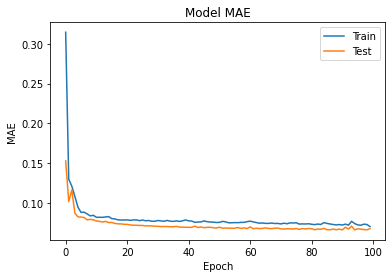

In [125]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

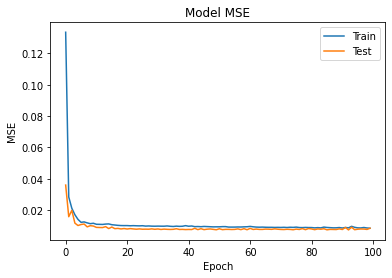

In [126]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [127]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

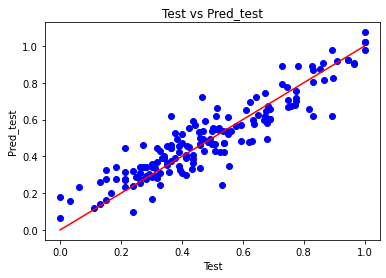

In [128]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

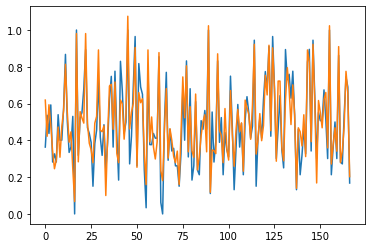

In [129]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [130]:
# Таким образом, обучение по обучающей выборке проведено.
# Теперь проверим работу нейроной сети на тестовой выборке.

# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

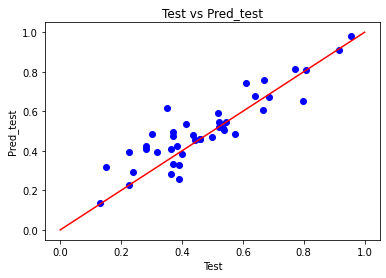

In [131]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

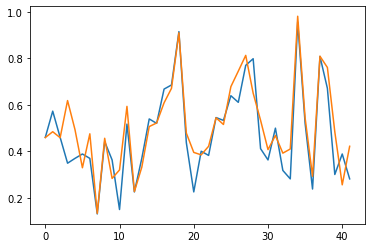

In [132]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [133]:
# Итого, качество работы нейронной сети на тестовых данных ниже, чем на обучающих - это ожидаемо.
# Тем не менее, нейронная сеть способна найти зависимости и предсказвать значение Y по X с приемлемым уровенм точности.

# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.09193047273872866
0.09204586634378263


In [134]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
# Для этого используем библиотеку scipy и метод stats.shapiro.
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9895468950271606, p = 0.25566670298576355
Test k = 0.9762228727340698, p = 0.5205116868019104


In [135]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9904346466064453, p_s = 0.18182773888111115
k_n = 4.3572322840247795, p_n = 0.11319807235632799


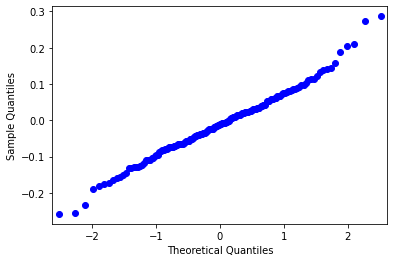

In [136]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

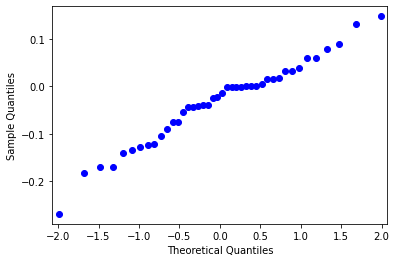

In [137]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

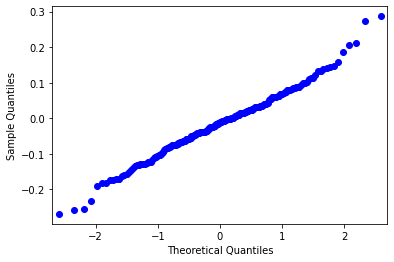

In [138]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

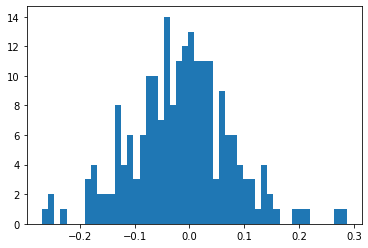

In [139]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [140]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SimpleNeuralNetwork.h5')